In [2]:
# 1
import pandas as pd
import glob
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt

# matplotlib 한글 표기 방법
from matplotlib import font_manager, rc

plt.rcParams['axes.unicode_minus'] = False
f_path = 'C:/Windows/Fonts/malgun.ttf'
# f_path = '/library/Fonts/AppleGothic.ttf' (맥)
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)
# --------------------------------------------------------------------


all_list = glob.glob('../datascience/data/names/yob*.txt')

# 전체 데이터에서 2000-2009 경로 데이터 추출
list_names = []
for x in all_list:
    check = int(x[-8:-4])
    if 2000 <= check <= 2009:
        list_names.append(x)
        
# 경로 데이터를 이용해 df 제작
df_list = []
for x in list_names:
    df = pd.read_csv(x, names=['Name','Sex','Number'])
    df['Year'] = x[-8:-4]
    df_list.append(df)
    
df_names = pd.concat(df_list)
df_names.shape

(325229, 4)

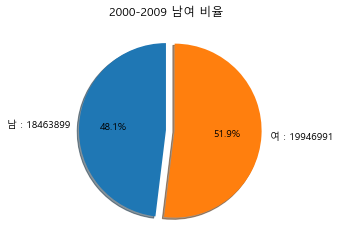

In [91]:
# 2
# 사전 조건 생성
amount = df_names.groupby('Sex')['Number'].sum()
labels = f'남 : {amount[0]}', f'여 : {amount[1]}' 


plt.figure()
plt.pie(amount, explode=[0,0.1], autopct='%1.1f%%', shadow=True, startangle=90, labels = labels)
plt.title('2000-2009 남여 비율')
plt.show()


Text(0, 0.5, 'count')

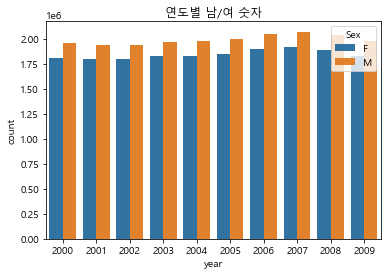

In [89]:
# 3
ax = plt.subplots()
ax = sns.barplot(x='Year', y='Number', hue='Sex', data=df_names.groupby(['Year','Sex']).sum().reset_index())
ax.set_title('연도별 남/여 숫자')
ax.set_xlabel('year')
ax.set_ylabel('count')